In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

from sklearn.feature_selection import RFE
from sklearn import svm,linear_model
from sklearn.model_selection import train_test_split
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,10)

In [2]:
df_train = pd.read_csv('D:\\personal\\kaggle datasets\\HousingPrices\\train.csv')
df_test = pd.read_csv('D:\\personal\\kaggle datasets\\HousingPrices\\test.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [5]:
combine = [df_train,df_test]

In [6]:
for data in combine:
    a=data.isnull().sum() / len(data) * 100
    print(a.sort_values(ascending=False))
    print('-'*20)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageCond        5.547945
GarageType        5.547945
GarageYrBlt       5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtExposure      2.602740
BsmtFinType2      2.602740
BsmtFinType1      2.534247
BsmtCond          2.534247
BsmtQual          2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
Utilities         0.000000
YearRemodAdd      0.000000
MSSubClass        0.000000
Foundation        0.000000
ExterCond         0.000000
ExterQual         0.000000
Exterior2nd       0.000000
Exterior1st       0.000000
RoofMatl          0.000000
RoofStyle         0.000000
YearBuilt         0.000000
                   ...    
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
3SsnPorch         0.000000
BsmtUnfSF         0.000000
S

### Some features have more than 80% of values missing, so its better to drop them

In [7]:
for data in combine:
    data.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)

### Filling missing values with Mode value

In [8]:
for c in df_train.columns:
    df_train[c].fillna(df_train[c].mode()[0],inplace=True)

In [9]:
for c in df_test.columns:
    df_test[c].fillna(df_test[c].mode()[0],inplace=True)

### Detecting Outliers

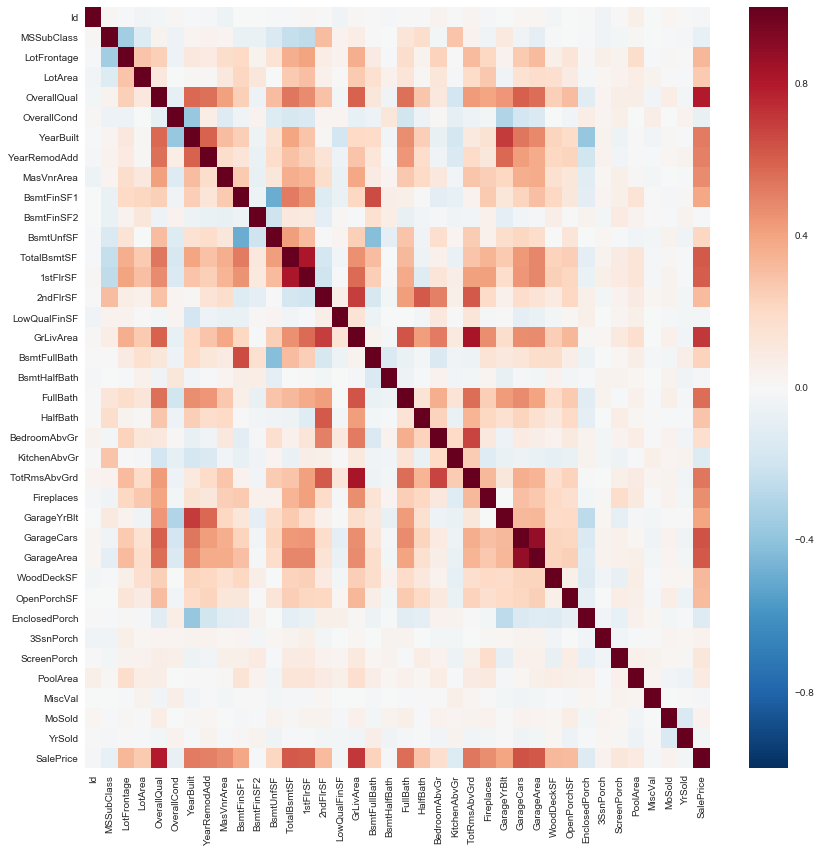

In [10]:
plt.figure(figsize=(14,14))
sns.heatmap(df_train.corr())

#### We can analyze from above graph that there are some features which highly correlate with SalePrice.
#### We can detect outliers for these features.

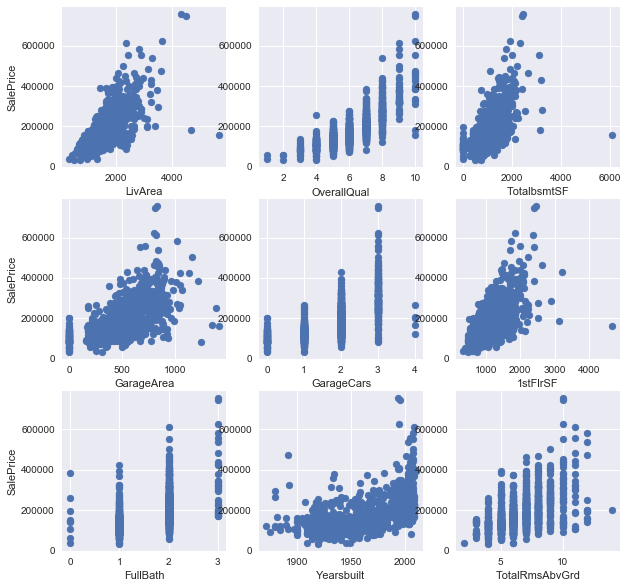

In [11]:
plt.subplot(3,3,1)
plt.scatter(x=df_train.GrLivArea,y=df_train.SalePrice)
plt.xlabel('LivArea')
plt.ylabel('SalePrice')

plt.subplot(3,3,2)
plt.scatter(x=df_train.OverallQual,y=df_train.SalePrice)
plt.xlabel('OverallQual')


plt.subplot(3,3,3)
plt.scatter(x=df_train.TotalBsmtSF,y=df_train.SalePrice)
plt.xlabel('TotalbsmtSF')


plt.subplot(3,3,4)
plt.scatter(x=df_train.GarageArea,y=df_train.SalePrice)
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')

plt.subplot(3,3,5)
plt.scatter(x=df_train.GarageCars,y=df_train.SalePrice)
plt.xlabel('GarageCars')


plt.subplot(3,3,6)
plt.scatter(x=df_train['1stFlrSF'],y=df_train.SalePrice)
plt.xlabel('1stFlrSF')


plt.subplot(3,3,7)
plt.scatter(x=df_train.FullBath,y=df_train.SalePrice)
plt.xlabel('FullBath')
plt.ylabel('SalePrice')

plt.subplot(3,3,8)
plt.scatter(x=df_train.YearBuilt,y=df_train.SalePrice)
plt.xlabel('Yearsbuilt')


plt.subplot(3,3,9)
plt.scatter(x=df_train.TotRmsAbvGrd,y=df_train.SalePrice)
plt.xlabel('TotalRmsAbvGrd')

In [12]:
#subplot(3,3,1)
#Some houses having area greater than 4000 have price less than 300000 which is illogical.So these are outliers.
df_train = df_train.drop(df_train[(df_train['GrLivArea'] > 4000) & (df_train['SalePrice'] < 300000)].index)

#subplot(3,3,2)
#Some houses having Overall quality greater than 9 have price less than 200000 which contribute as outliers.
df_train = df_train.drop(df_train[(df_train['OverallQual'] > 9) & (df_train['SalePrice'] < 200000)].index)

#subplot(3,3,3)
df_train = df_train.drop(df_train[(df_train['TotalBsmtSF'] > 2400) & (df_train['SalePrice'] < 300000)].index)

#subplot(3,3,4)
#Some houses having garage area greater than 1100 have price less than 225000 which contribute as outliers.
df_train = df_train.drop(df_train[(df_train['GarageArea'] > 1100) & (df_train['SalePrice'] < 300000)].index)

#subplot(3,3,5)
#Some houses having more than 3 cars have price less than 300000 which contribute as outliers.
df_train = df_train.drop(df_train[(df_train['GarageCars'] > 3) & (df_train['SalePrice'] < 300000)].index)

#subplot(3,3,6)
#Some houses having 1 extra floor have price less than 300000 which contribute as outliers.
df_train = df_train.drop(df_train[(df_train['1stFlrSF'] > 2500) & (df_train['SalePrice'] < 300000)].index)

#subplot(3,3,9)
#Some houses having more than 10 rooms above groud have price less than 300000 which contribute as outliers.
df_train = df_train.drop(df_train[(df_train['TotRmsAbvGrd'] > 10) & (df_train['SalePrice'] < 300000)].index)

#### Graphs after dropping outliers.

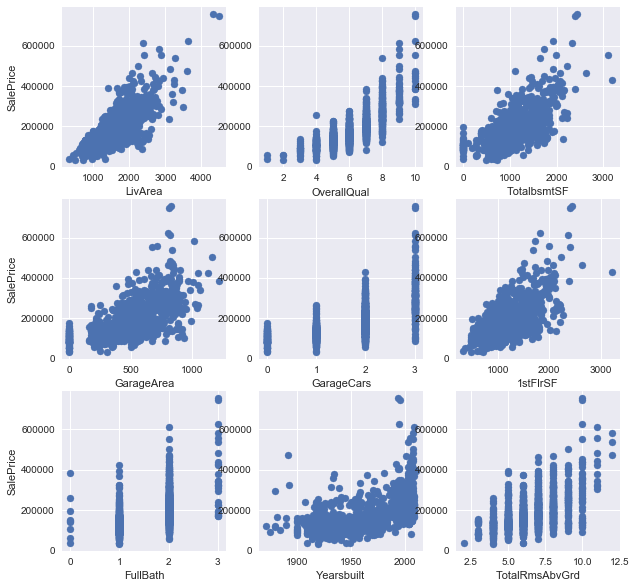

In [13]:
plt.subplot(3,3,1)
plt.scatter(x=df_train.GrLivArea,y=df_train.SalePrice)
plt.xlabel('LivArea')
plt.ylabel('SalePrice')

plt.subplot(3,3,2)
plt.scatter(x=df_train.OverallQual,y=df_train.SalePrice)
plt.xlabel('OverallQual')


plt.subplot(3,3,3)
plt.scatter(x=df_train.TotalBsmtSF,y=df_train.SalePrice)
plt.xlabel('TotalbsmtSF')


plt.subplot(3,3,4)
plt.scatter(x=df_train.GarageArea,y=df_train.SalePrice)
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')

plt.subplot(3,3,5)
plt.scatter(x=df_train.GarageCars,y=df_train.SalePrice)
plt.xlabel('GarageCars')


plt.subplot(3,3,6)
plt.scatter(x=df_train['1stFlrSF'],y=df_train.SalePrice)
plt.xlabel('1stFlrSF')


plt.subplot(3,3,7)
plt.scatter(x=df_train.FullBath,y=df_train.SalePrice)
plt.xlabel('FullBath')
plt.ylabel('SalePrice')

plt.subplot(3,3,8)
plt.scatter(x=df_train.YearBuilt,y=df_train.SalePrice)
plt.xlabel('Yearsbuilt')


plt.subplot(3,3,9)
plt.scatter(x=df_train.TotRmsAbvGrd,y=df_train.SalePrice)
plt.xlabel('TotalRmsAbvGrd')

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

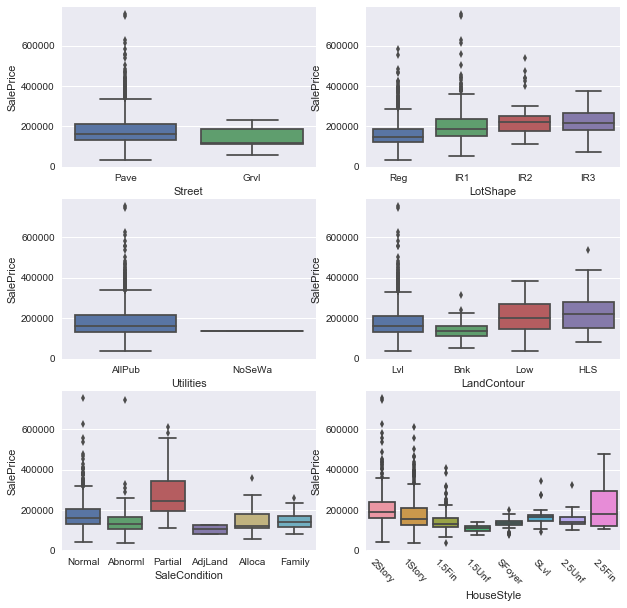

In [71]:
plt.subplot(3,2,1)
sns.boxplot(x=df_train.Street,y=df_train.SalePrice)
plt.xlabel('Street')
plt.ylabel('SalePrice')

plt.subplot(3,2,2)
sns.boxplot(x=df_train.LotShape,y=df_train.SalePrice)
plt.xlabel('LotShape')


plt.subplot(3,2,3)
sns.boxplot(x=df_train.Utilities,y=df_train.SalePrice)
plt.xlabel('Utilities')
plt.ylabel('SalePrice')

plt.subplot(3,2,4)
sns.boxplot(x=df_train.LandContour,y=df_train.SalePrice)
plt.xlabel('LandContour')


plt.subplot(3,2,5)
sns.boxplot(x=df_train.SaleCondition,y=df_train.SalePrice)
plt.xlabel('SaleCondition')
plt.ylabel('SalePrice')

plt.subplot(3,2,6)
sns.boxplot(x=df_train.HouseStyle,y=df_train.SalePrice)
plt.xlabel('HouseStyle')
plt.xticks(rotation=-45)

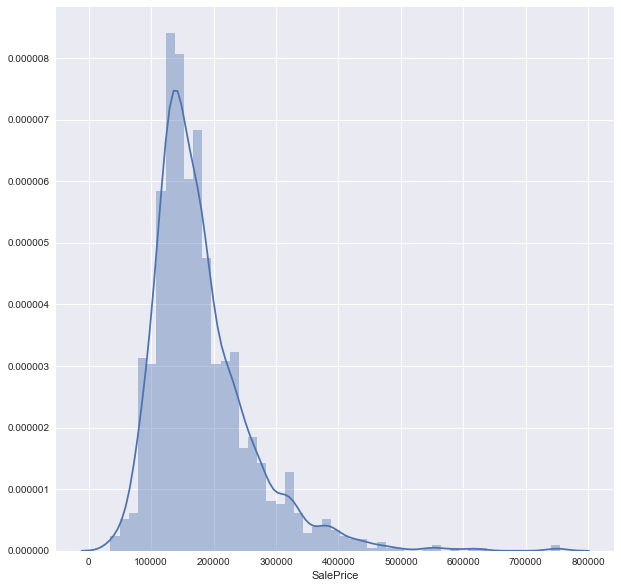

In [55]:
sns.distplot(df_train.SalePrice)

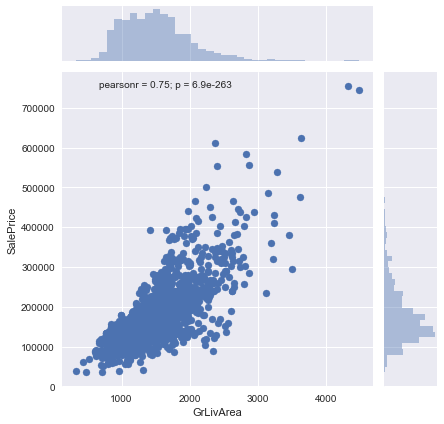

In [63]:
sns.jointplot(x='GrLivArea',y='SalePrice',data=df_train)

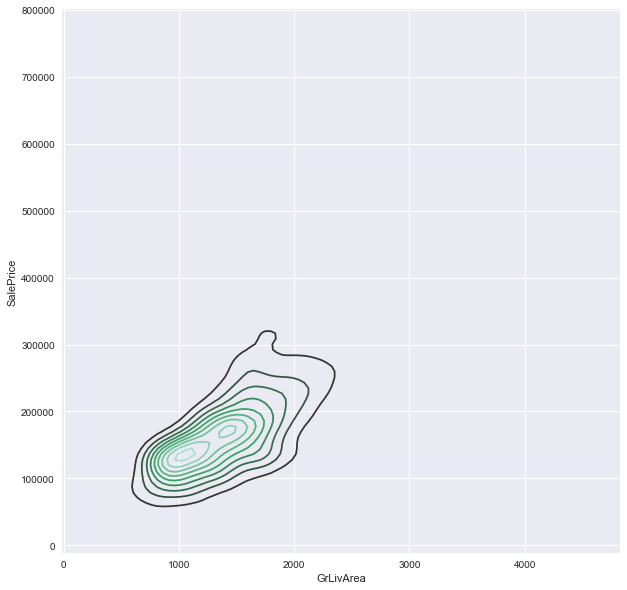

In [64]:
sns.kdeplot(df_train.GrLivArea,df_train.SalePrice)

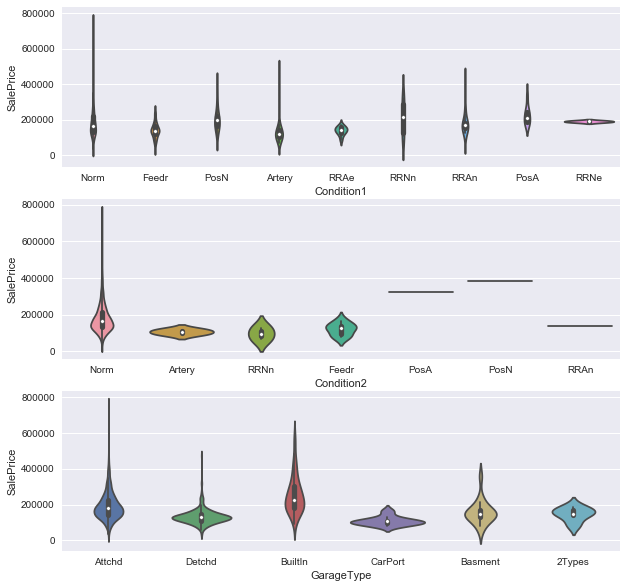

In [73]:
plt.subplot(3,1,1)
sns.violinplot(x='Condition1',y='SalePrice',data=df_train)

plt.subplot(3,1,2)
sns.violinplot(x='Condition2',y='SalePrice',data=df_train)

plt.subplot(3,1,3)
sns.violinplot(x='GarageType',y='SalePrice',data=df_train)